In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [3]:
df = sns.load_dataset('flights')

In [4]:
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [5]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [6]:
ddf = df.groupby(df['year']).sum()

In [7]:
ddf = ddf.reset_index()

In [8]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   year        12 non-null     int64
 1   passengers  12 non-null     int64
dtypes: int64(2)
memory usage: 320.0 bytes


No handles with labels found to put in legend.


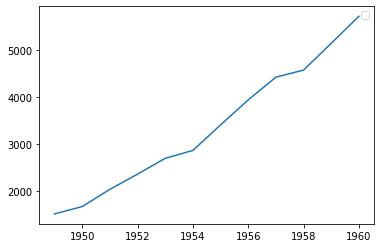

In [9]:
plt.plot(ddf['year'], ddf['passengers'])
plt.legend()
plt.show()

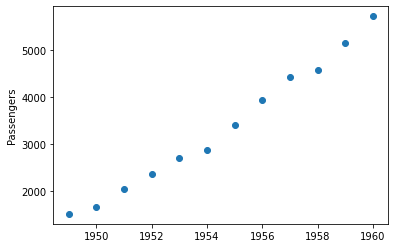

In [10]:
plt.scatter(ddf['year'], ddf['passengers'])
plt.ylabel('Passengers')
plt.show()

In [11]:
ddf.corr()

,year,passengers
year,1.00000,0.99328
passengers,0.99328,1.00000


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
df_values = ddf['year'].values
datalist = []
datalist.append(df_values)
data_array = np.array(ddf['year'])
data_reshape = data_array.reshape(12, 1)

In [14]:
X = data_reshape
y = ddf['passengers']

In [15]:
line_fitter = LinearRegression()
line_fitter.fit(X, y)

LinearRegression()

In [16]:
y_predicted = line_fitter.predict(X)

In [17]:
y_predicted 

array([1256.6025641 , 1639.68997669, 2022.77738928, 2405.86480186,
       2788.95221445, 3172.03962704, 3555.12703963, 3938.21445221,
       4321.3018648 , 4704.38927739, 5087.47668998, 5470.56410256])

In [18]:
print('선형 회귀 모델의 계수 : ',line_fitter.coef_)

선형 회귀 모델의 계수 :  [383.08741259]


In [19]:
print('선형 회귀 모델의 절편 : ', line_fitter.intercept_)

선형 회귀 모델의 절편 :  -745380.7645687643


In [20]:
print('{:.2f}%'.format((line_fitter.score(X, y))*100))

98.66%


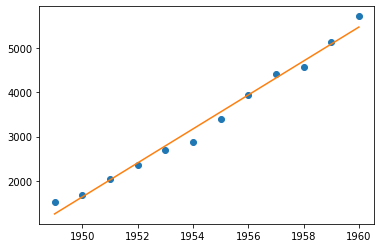

In [21]:
plt.plot(X, y, 'o')
plt.plot(X,line_fitter.predict(X))
plt.show()